In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading audio files

In [2]:
video_path1 = '../../Media/positive_samples/hit_1.mp4'
video_path2 = '../../Media/positive_samples/hit_2.mp4'
video_path3 = '../../Media/positive_samples/hit_3.mp4'



In [3]:
ipd.Audio(video_path1)

In [4]:
ipd.Audio(video_path2)

In [5]:
ipd.Audio(video_path3)

In [6]:
# load audio files with librosa
debussy, sr = librosa.load(video_path1)
redhot, _ = librosa.load(video_path2)
duke, _ = librosa.load(video_path3)

/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89306/1482760701.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  debussy, sr = librosa.load(video_path1)
/Users/nadkarnimbp/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykernel_89306/1482760701.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  redhot, _ = librosa.load(video_path2)
/Users/nadkarnimbp/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jn/vn4rr64x6kz2cx2s6lzslsfc0000gp/T/ipykern

## Basic information regarding audio files

In [7]:
debussy.shape

(49088,)

In [8]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [9]:
# total number of samples in audio file
tot_samples = len(debussy)
tot_samples

49088

In [10]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 2.2262131519274377 seconds


## Visualising audio signal in the time domain 

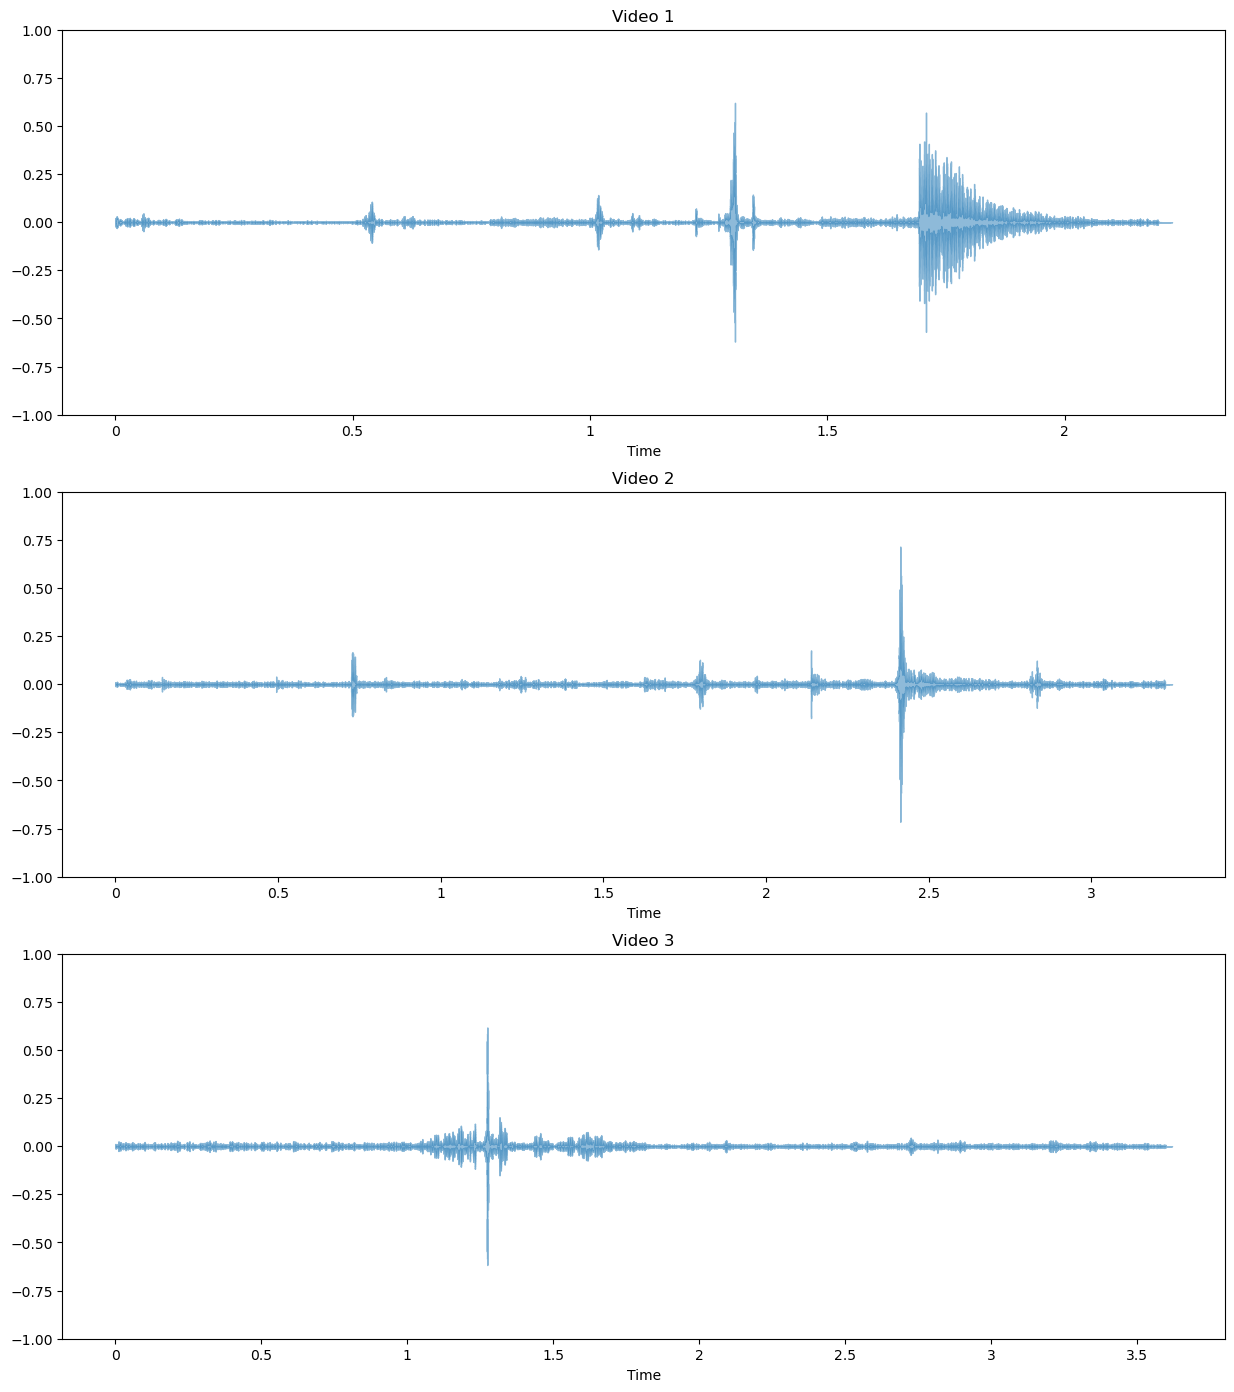

In [11]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Video 1")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Video 2")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Video 3")

plt.show()

## Calculating amplitude envelope

In [12]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

In [13]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [14]:
# number of frames in amplitude envelope
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)


In [15]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)

print(len(ae_debussy),len(ae_redhot),len(ae_duke))

96 140 156


## Visualising amplitude envelope

In [16]:
frames1 = range(len(ae_debussy))
frames2 = range(len(ae_redhot))
frames3 = range(len(ae_duke))

t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)
t3 = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)

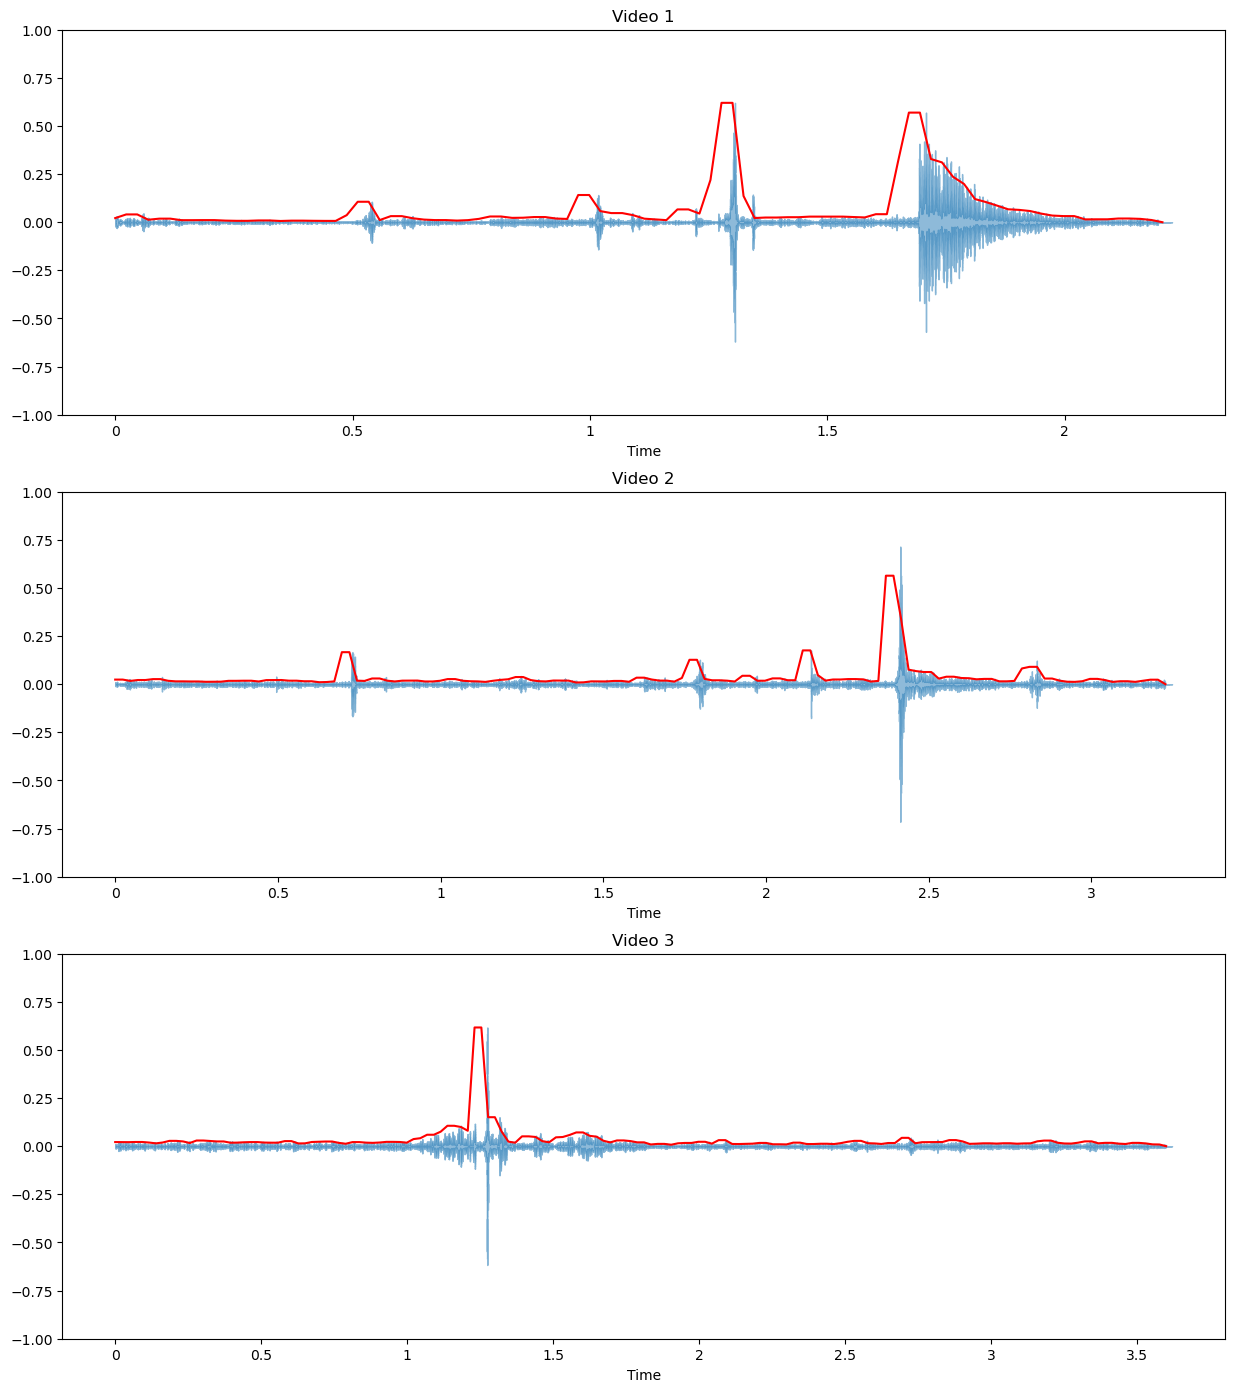

In [17]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, ae_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Video 1")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("Video 2")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Video 3")

plt.show()